## Gender-Wage Gap Analysis

Understanding pay gap especially between male and female in an organization is very important in managing human resources. If gender-pay gap exists in an organization and workers recognize this to be so, there might be a high incidence of churn in the organization.

From the perspective of strategic managmenet scholars, organizations that experiences high rate of turnover of its employees will suffer from competitive disadvantage compared to its peers in the industry.

This project hence sought to examine whether a gender-pay gap exists in this organization and to decompose it into explained and unexplained components.

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### import the dataset

In [2]:
data <- read_csv("https://github.com/fobembe/Dataset/raw/main/paygap.csv",show_col_types = FALSE)
head(data)

jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


In [3]:
# Recode perfEval

data <- data %>%
  mutate(perf=recode(perfEval, '5'='Excellent', '4'='Very Good','3'='Good','2'='Poor','1'='Very Poor'))

In [4]:
head(data)

jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,perf
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938,Excellent
Software Engineer,Male,21,5,College,Management,5,108476,11128,Excellent
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,Very Good
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,Excellent
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,Excellent
IT,Female,20,5,PhD,Operations,4,70890,10126,Excellent


In [5]:
unique(data$seniority)

[1] 2 5 4 3 1

In [6]:
# Create a TotalPay variable from basePay and bonus

data <- data %>%
  mutate(Pay = basePay + bonus)

In [7]:
#Create Age brackets

data <- data %>%
  mutate(agecat = cut(age,
breaks = c(0,25,35,45,55,Inf),right=FALSE))

In [8]:
job <- data%>%
  group_by(jobTitle,gender) %>%
  summarize(AvgPay = mean(Pay))

`summarise()` has grouped output by 'jobTitle'. You can override using the
`.groups` argument.


In [9]:
head(job)

jobTitle,gender,AvgPay
<chr>,<chr>,<dbl>
Data Scientist,Female,102452.26
Data Scientist,Male,95450.00
Driver,Female,93197.35
Driver,Male,98417.80
Financial Analyst,Female,101743.65
Financial Analyst,Male,101116.36


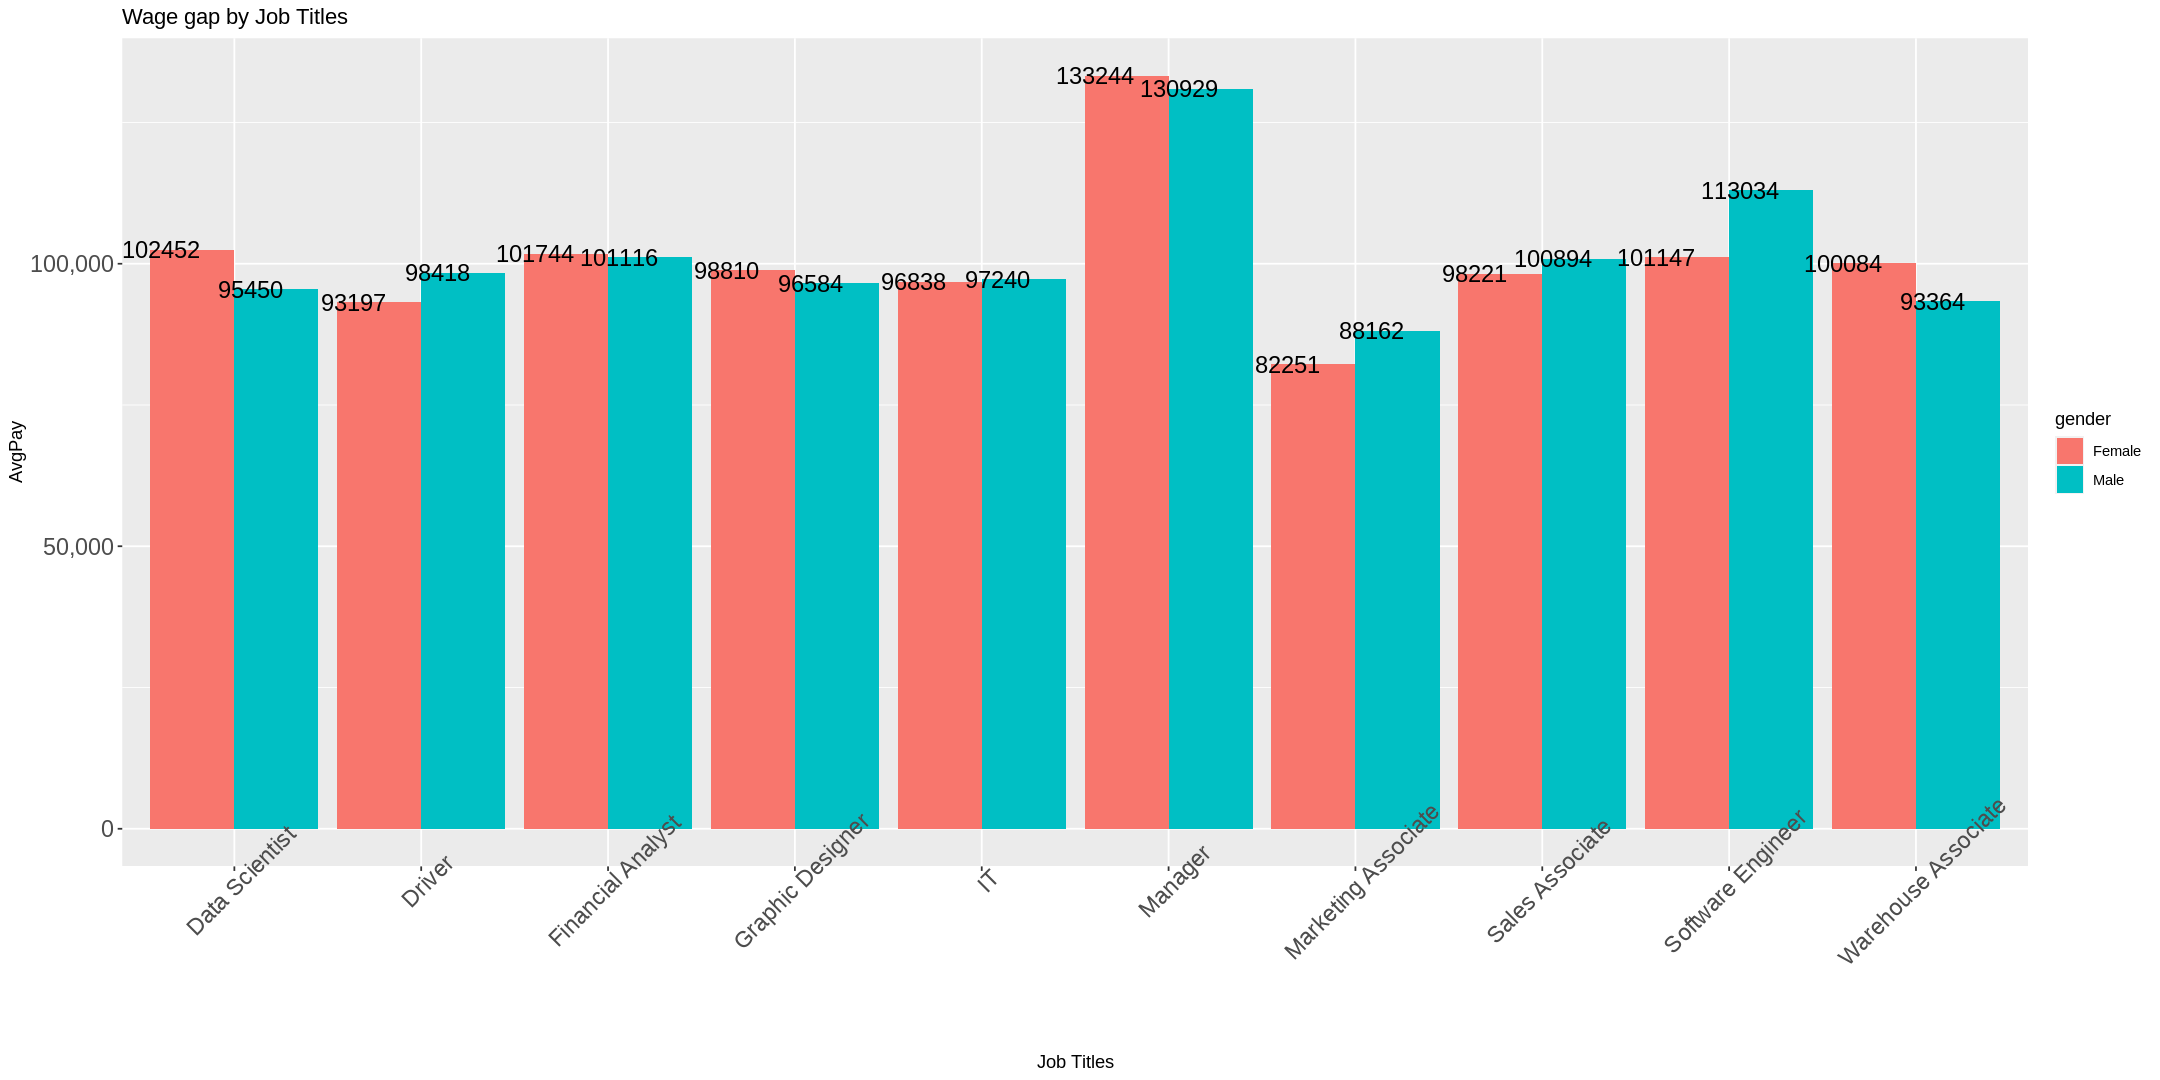

In [29]:
job %>%
  ggplot(aes(jobTitle,AvgPay, fill=gender),AvgPay)+
  geom_bar(stat="identity", position="dodge",width = 0.9) +
    labs(title="Wage gap by Job Titles",
        x="Job Titles", y= "AvgPay")+
  geom_text(aes(label = round(AvgPay, 0)),
            position = position_dodge(0.9),
            color="black",vjust = 0.5,hjust = 0.9,size=5)+
              scale_y_continuous(labels=scales::comma)+
              theme(axis.text.x = element_text(size = 14,angle=45),axis.text.y=element_text(size=14))
    options(repr.plot.width =18, repr.plot.height =9)

There seem to be some degree of parity between male and female in the distribution of wages according to job titles except in some few situations where men earn more than women.  For instance, software engineers that are males seem to earn more than their female counterparts likewise those in markeing and sales.  Female employee on the other hand seem to earn more than their male counterparts in data science, managers and warehouse associates.  On the whole the wage difference between male and female were observed both genders.

In [11]:
# Education and wage-gap analysis

educ <- data%>%
  group_by(edu,gender) %>%
  summarize(AvgPay = mean(Pay))

`summarise()` has grouped output by 'edu'. You can override using the `.groups`
argument.


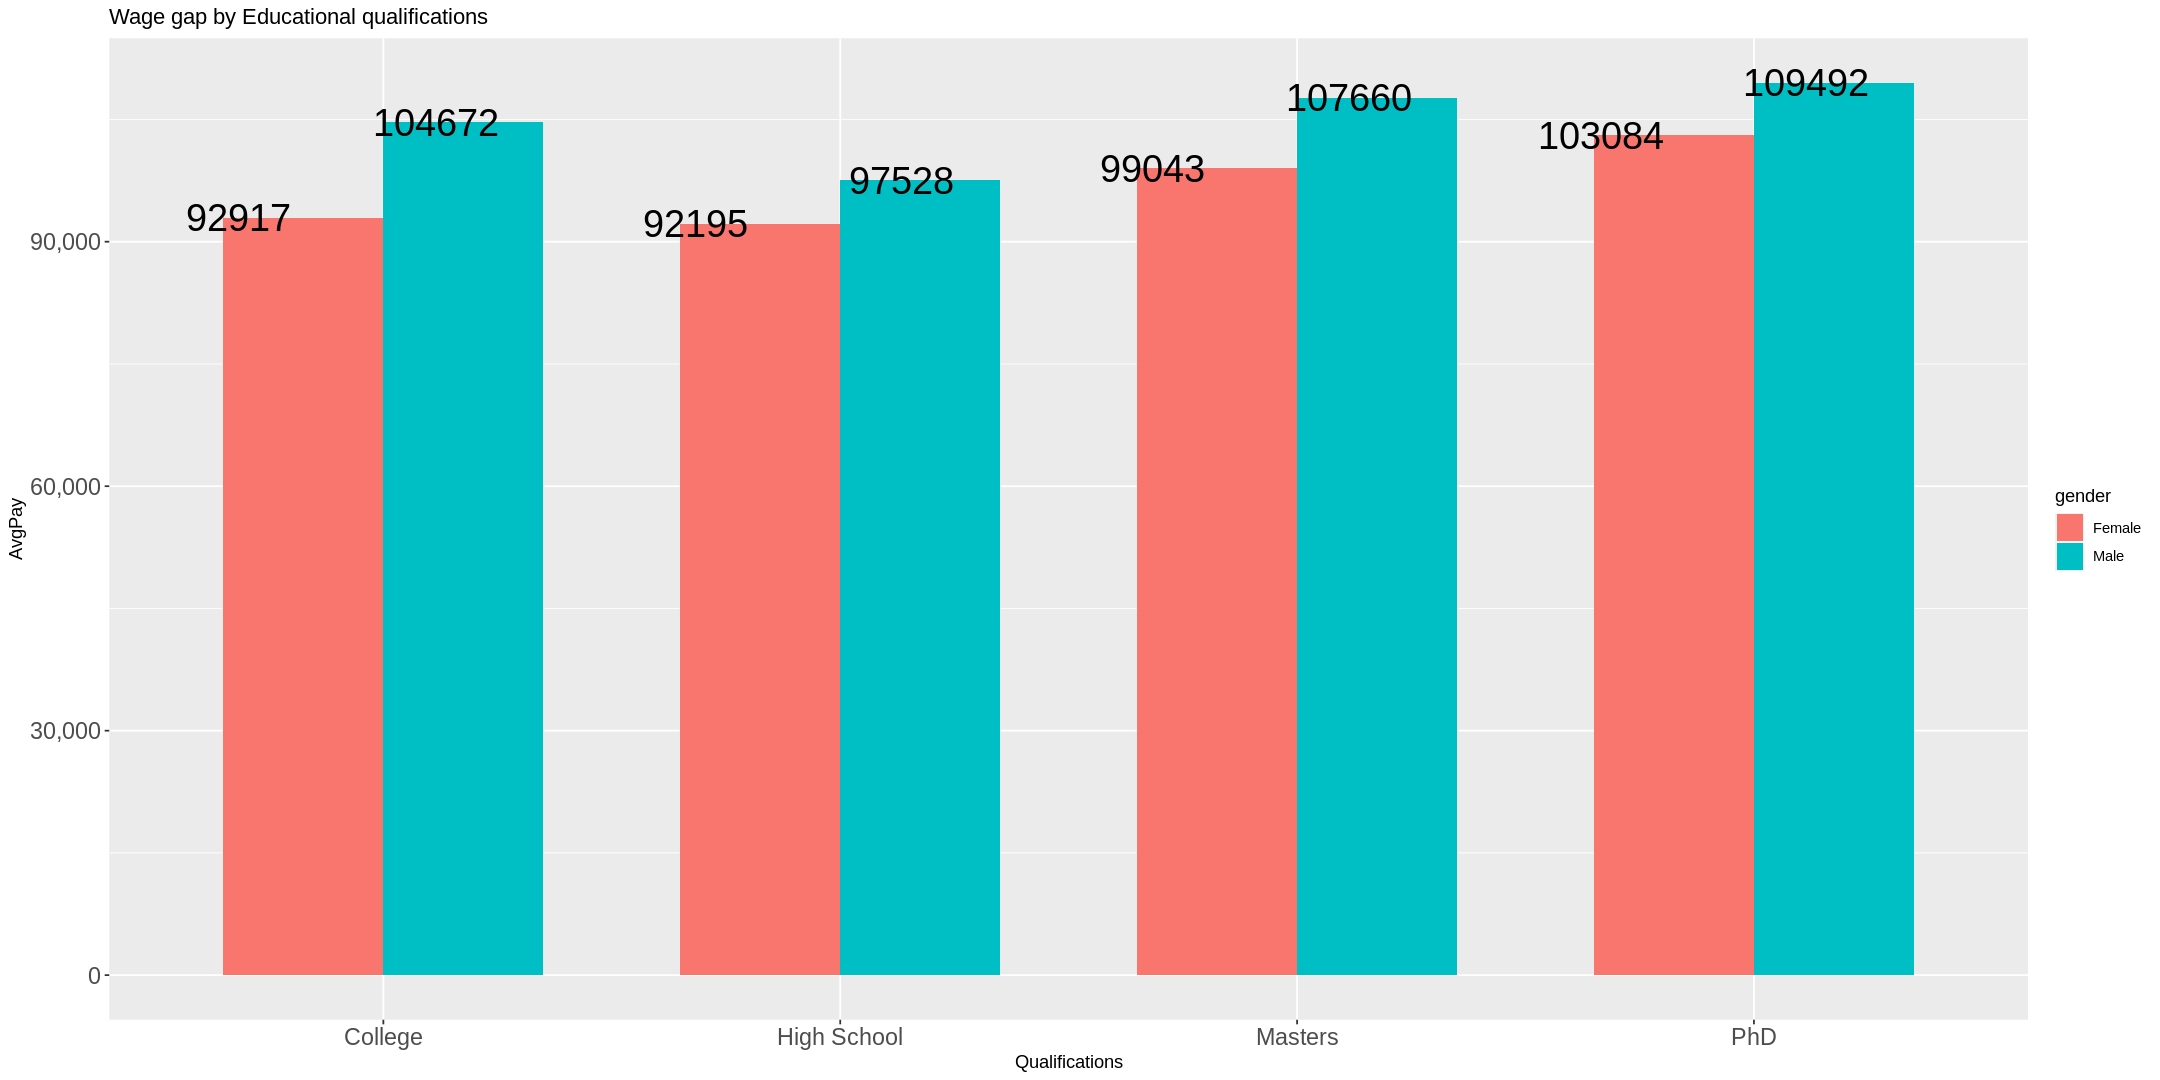

In [12]:
educ %>%
  ggplot(aes(edu,AvgPay, fill=gender),AvgPay)+
  geom_bar(stat="identity", position="dodge",width = 0.7) +
    labs(title="Wage gap by Educational qualifications",
        x="Qualifications", y= "AvgPay")+
  geom_text(aes(label = round(AvgPay, 0)),
            position = position_dodge(0.9),
            color="black",vjust = 0.5,hjust = 0.9,size=8)+
              scale_y_continuous(labels=scales::comma)+
              theme(axis.text.x = element_text(size = 14),axis.text.y=element_text(size=14))
    options(repr.plot.width =18, repr.plot.height =9)

Male workers clearly had a higher wage differential compared to females across alll the class of degrees or qualifications.  The degree of inequality can be mostly found among the college graduates followed by those with Masters, then PhD.  One possible explanation for this might be the years of experience.

In [13]:
# Wage gap analysis by gender and department

dept <- data%>%
  group_by(dept,gender) %>%
  summarize(AvgPay = mean(Pay))

`summarise()` has grouped output by 'dept'. You can override using the
`.groups` argument.


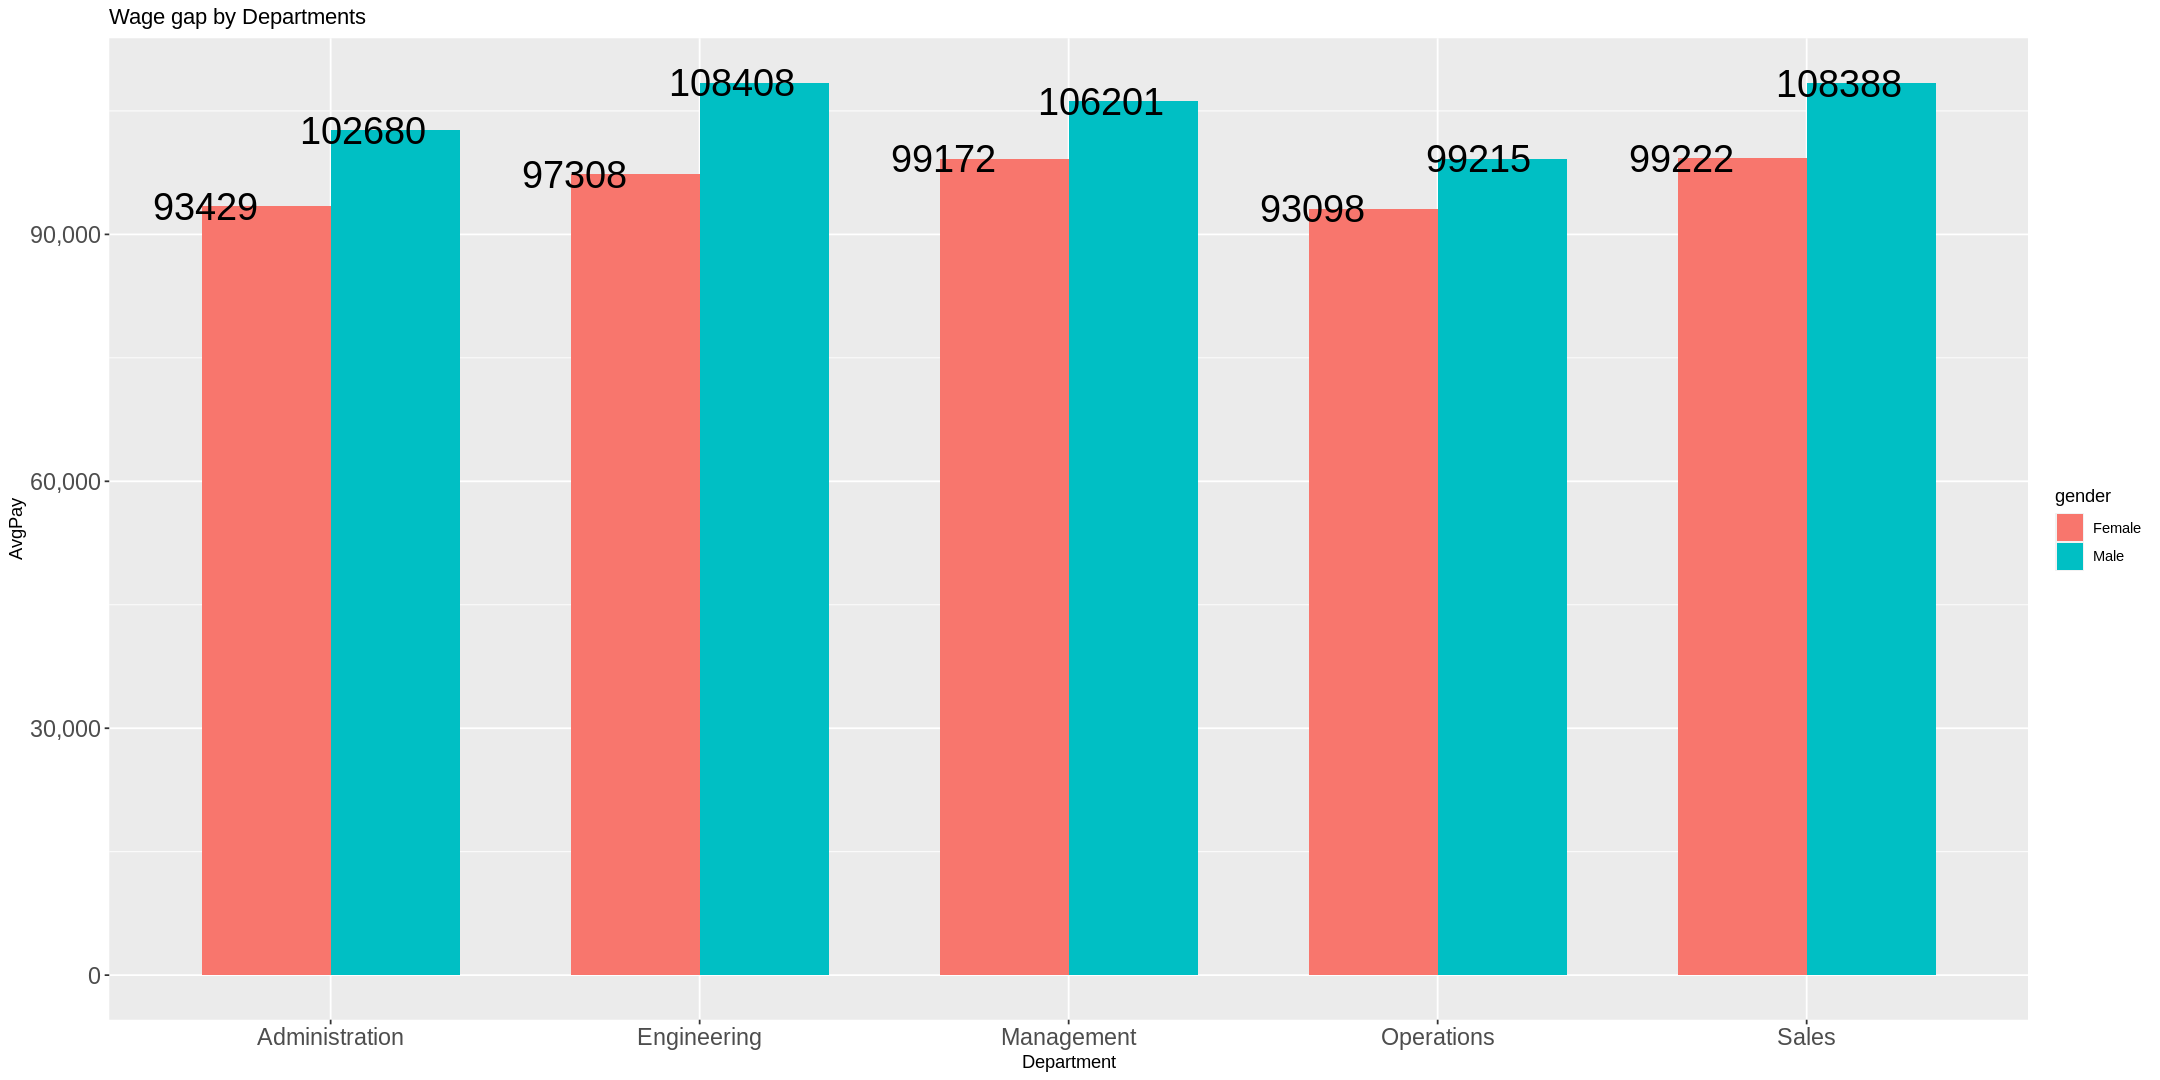

In [14]:
dept %>%
  ggplot(aes(dept,AvgPay, fill=gender),AvgPay)+
  geom_bar(stat="identity", position="dodge",width = 0.7) +
    labs(title="Wage gap by Departments",
        x="Department", y= "AvgPay")+
  geom_text(aes(label = round(AvgPay, 0)),
            position = position_dodge(0.9),
            color="black",vjust = 0.5,hjust = 0.9,
            size=8)+
              scale_y_continuous(labels=scales::comma)+
              theme(axis.text.x = element_text(size = 14),axis.text.y=element_text(size=14))
    options(repr.plot.width =18, repr.plot.height =9)

The distribution of differentials in wages between male and female seem to be much more pronouced as well betweeen the departments.  As we can see from the above figure, males earn higher than female across all the departments.

### Model Estimation least square method

We built 3 models to explain gender wage gap.  The first model was built without incorporating any cotrol variable for gender, while the second model control for human capital variables education, age categories and performance evaluation.  The third model incorporated all the control variables.  The overall results show that male earned higher than female in the first 2 models, with a statistical significant difference.  However, in the third, model, the difference was no longer significantly different.

In [15]:
# Get the log of Total pay

data <- data%>%
  mutate(TotalPay = basePay+bonus)%>%
    mutate(logpay = log(TotalPay,base=exp(1)))

In [16]:
# OLS and controls

m1 <- lm(logpay ~ gender,data=data)  # no controls
m2 <- lm(logpay ~ gender + perfEval + agecat + edu, data = data)  # human capital controls
m3 <- lm(logpay ~ gender + perfEval + agecat + edu + dept + seniority + jobTitle, data = data) # all the controls

In [17]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
library(stargazer)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [19]:
stargazer(m1,m2,m3,type="text",out="models.txt")


                                                       Dependent variable:                           
                            -------------------------------------------------------------------------
                                                             logpay                                  
                                      (1)                     (2)                      (3)           
-----------------------------------------------------------------------------------------------------
genderMale                         0.088***                0.090***                   0.005          
                                    (0.017)                 (0.014)                  (0.008)         
                                                                                                     
perfEval                                                     0.006                  0.013***         
                                                            (0.005)              

The results show that there was a signiginificant wage difference between male and female when we did not control for any of the variables, similarly, when we controlled for human capital variables, males still recorded a higher pay compared to their female counterparts.  However, when we included all the controls, there was no significant difference between the male and female workers.

## Using Blinder-Oaxaca Decomposition Method

In [20]:
head(data)

jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,perf,Pay,agecat,TotalPay,logpay
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938,Excellent,52301,"[0,25)",52301,10.86477
Software Engineer,Male,21,5,College,Management,5,108476,11128,Excellent,119604,"[0,25)",119604,11.69194
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,Very Good,99476,"[0,25)",99476,11.50767
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,Excellent,118234,"[0,25)",118234,11.68042
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,Excellent,108783,"[25,35)",108783,11.59711
IT,Female,20,5,PhD,Operations,4,70890,10126,Excellent,81016,"[0,25)",81016,11.30240


In [ ]:
remotes::install_github("SinanPolatoglu/OaxacaBlinder")

In [22]:
library(OaxacaBlinder)

In [23]:
m4 = OaxacaBlinderDecomp(logpay ~ perfEval + agecat + edu + dept + seniority + jobTitle|gender,data,
type = "threefold",
pooled = "jann",
baseline_invariant=TRUE)

In [24]:
summary(m4)

Oaxaca Blinder Decomposition model
----------------------------------
Type: threefold
Formula: logpay ~ perfEval + agecat + edu + dept + seniority + jobTitle |      gender
Data: data

Descriptives
                 n    %n mean(logpay)
gender==Male   532 53.2%        11.53
gender==Female 468 46.8%        11.44

Gap: 0.09
% Diff: 0.76%
             coefficient   % of gap
endowments          0.08      94.3%
coefficients        0.02      18.2%
interaction        -0.01     -12.6%


In [25]:
round(coef(m4,ci=TRUE),3)

,endowments,coefficients,interaction
,<dbl>,<dbl>,<dbl>
(Intercept),0.000,0.090,0.000
perfEval,0.003,-0.016,-0.001
"agecat[25,35)",0.000,0.002,0.000
"agecat[35,45)",0.000,-0.001,0.000
"agecat[45,55)",-0.005,-0.003,0.001
"agecat[55,Inf)",0.003,-0.002,0.000
eduHigh School,0.001,-0.001,0.000
eduMasters,0.001,0.005,0.001
eduPhD,0.001,-0.006,-0.001


The oaxaca decomposition method show a wage gap of 0.76 per cent and this can be decomposed into endowments effect (94%) and coefficient effect (18%).